<a href="https://colab.research.google.com/github/mrri-18/swu_3/blob/main/rst_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Practice 2] : Supervised Learning
0. Problem Define 
1. Library import
2. Data Collection
3. EDA(Exploratory Data Analysis) : 데이터 탐색
4. Preprocessing
    - 4.1 Stemmer 
    - 4.2 Bag of Words : 문장별 단어 벡터 만들기
    - 4.3 Train : Test 로 나누기
5. Modeling

[0]: Problem Define
레스토랑 리뷰 : 레스토랑 리뷰를 분석하여 Positive/Negative로 분류합니다.

Data: Kaggle (https://www.kaggle.com/akram24/restaurant-reviews)

[1] Libraries setteting : import libraries

In [1]:
### Import Libraries
import pandas as pd # data provessing, CSV file I/O(e.g.pd.read_csv)
import numpy as np #수치연산

## Visualization Libraries
import matplotlib.pyplot as plt  # https://matplotlib.org/stable/gallery/index
import seaborn as sns  # https://seaborn.pydata.org/
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

[2]: Data Collection

[2.1]: 사용할 데이터 셋을 가져옵니다: Restaurant Review

In [2]:
dataset=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv", delimiter='\t')
### TSV: 파일 형식 "탭으로 구분 된 값"을 의미하고,
### 이 탭으로 구분 된 값 파일이 많은 스프레드 시트 응용 프로그램에 의해 만들어지고 사용
### 1000개의 레스토랑 리뷰를 가져옵니다.

In [3]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 한 번 살펴봅니다.
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#데이터 셋 구조보기
dataset.shape
dataset.describe()
#.describe() 함수는 데이터의 컬럼별 요약 통계량을 나타냅니다. 
# mean(), max(), median()등 개별 함수를 사용하여 통계량을 계산할 수도 있습니다

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
### [data type]을 확인합니다.
dataset.info()
### [결측치] : 비어있는 데이터를 찾습니다. 
### 여기서는 어떤 컬럼(변수, 특성, x)에 결측치가 많은지 봅니다.
dataset.isnull().sum() # There has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Review    0
Liked     0
dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

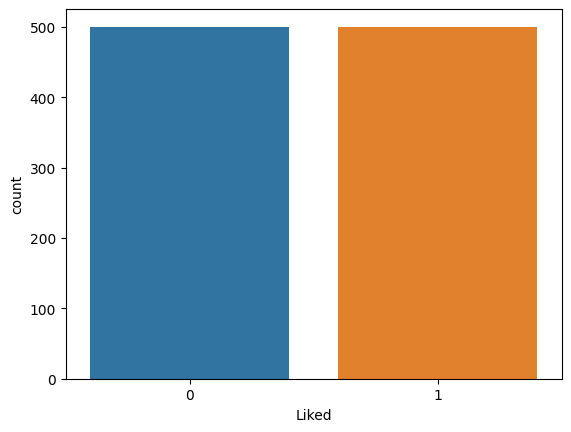

In [7]:
sns.countplot(x = dataset['Liked'], data = dataset) #시본스 통계 나타냄, 0과1이 얼마나 있는지 출력


In [8]:
dataset[dataset['Liked'] == 0]["Liked"].count() #0,1이 얼마나 있는지 카운트
dataset[dataset['Liked'] == 1]["Liked"].count()

500

[4]: Preprocessing 

In [9]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re # 정규화

[nltk.corpus.stopword]

자연어처리를 할때, 너무 빈번하게 나와서, 아무의미 없다고 판단되는 단어들을 보통 “stopword”라고 부릅니다.

가령, ‘a’, ‘the’와 같은 단어들은 모든 구문(phrase)들에 매우 많이 등장합니다.

따라서 아무 의미를 가지지 못합니다.

사실 연구자 혹은 분석가가 자연어 처리중에 보면, “아 이 단어는 제외해야겠구나”라는 생각이 옵니다.

앞에서 본 것처럼 너무 명확하고, 아무 의미가 없는 것이니까요.


Reference: https://frhyme.github.io/python-libs/nltk_stopwords/

[Stemming]

Stemming은 단어에서 접사(affix)를 제거하는 것을 의미합니다.

Stemming은 검색엔진에서 색인할 때 가장 많이 씁니다.

모든 형태의 단어를 저장하는것 보다 Stemming한 단어를 저장하는 것이 색인 크기를 줄일 뿐만아니라 검색 정확성을 높일 수 있습니다.

이런 알고리즘 stemmer/stemming algorithm 이라고 합니다.

Reference: https://excelsior-cjh.tistory.com/67

In [10]:
stemmer = SnowballStemmer('english') 

In [11]:
corpus=[]

##stemmer = SnowballStemmer('english')
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])  #정규표현식을 사용하여 문자열에서 알파벳(az, AZ)을 제외한 모든 문자를 공백으로 대체
    ## ^뒤의 문자열로 문자열이 시작됩니다.
    ## 가정입니다. 
    ## 문자열에서 알파벳을 제외한 문자열을 공백으로 대체한 결과를 review 변수에 저장
    ## 영어 문장에 각주 등과 같은 이유로 특수 문자가 섞여있습니다. 
    ## 자연어 처리를 위해 특수 문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하는 등의 사용 용도로 쓸 수 있습니다.
    
    review = review.lower() ## 대문자를 소문자로 바꾸어 줍니다.
    review = review.split() #띄어쓰기 기반으로 나눈다
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))] 
    # review의 word를 stemmer 에 있는 모든 단어에서 접사를 빼고 review 에 넣어줍니다. 
    # review 리스트에서 불용어(stopwords)를 제거하고, 남은 단어들에 대해 어간 추출을 적용한 결과를 반환
    
    review = ' '.join(review)
    corpus.append(review)
    #append를 사용해서 계속 붙여 나갑니다.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
### import nltk
### nltk.download()

### 또다른 방법
### !pip install nltk (at jupyter)
### pip install nltk(at python console)

dataset.head() #원래 데이터 셋 
### dataset=pd.read_csv("./data/Restaurant_Reviews.tsv", delimiter='\t')

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1



#해석)
모든 데이터의 전처리를 잘 마쳤는지, corpus의 길이를 확인합니다.

corpus는 전처리된 리스트들이 들어 있는 테이블 입니다.
> 들여쓴 블록



In [14]:
len(corpus)

1000

In [15]:
len(dataset) ## 기존 데이터셋과 같음을 확인하기 위해 점검
dataset.tail() #0~999번까지 데이터 존재

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


#[4-2 Bag of Words]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
### Convert a collection of text documents to a matrix of token counts
### sklearn>>feature_extraction>>text>>CountVectorizer

In [17]:
#CountVectorizer는 입력된 텍스트 데이터에서 단어의 빈도수를 기반으로 벡터화하는데 이 단어장의 최대 단어 개수를 1500개로 하겠다
cv = CountVectorizer(max_features=1500) #객체 생성

#[참고 1] max_features

max_feature는 최대 feature 갯수를 설정해주는 파라미터입니다.

해당 파라미터를 이해하려면, feature의 개념에 대해 아셔야 합니다.

머신러닝에서 feature란, 테이블의 컬럼에 해당하는 개념입니다. 또한 행렬의 열에 해당하는 것이기도 합니다.

그럼 구체적인 예시를 코드로 한 번 살펴보겠습니다.

만약 한 문장에서 15 종류의 단어가 사용되었다면, feature 값은 15이다. 

max_features 값은 최대 단어의 종류(15)가 될 것 이다.

또 다른 의미로는 너무 많은 단어가 있을 경우, 가장 빈도수가 높은 단어 15개만 사용합니다.

#[참고 2] CountVectorizer

단어들의 카운트(출현 빈도(frequency))로 여러 문서들을 벡터화
카운트 행렬, 단어 문서 행렬 (Term-Document Matrix, TDM))

모두 소문자로 변환시키기 때문에 me 와 Me 는 모두 같은 특성이 된다.


[참고 3] 두개의 새로운 문장을 리뷰들로 fit했던 단어들을 vectorizer로 변형시킵니다.
>>> X = cv.transform(['A whole new text zzzzzzzzz', 'Something very new new new phrase uh ?'])

>>> print X

(0, 8975) 1 \ (0, 13428) 1 \ (0, 14844) 1 \ (0, 15164) 1 \ (1, 8975) 3 \ (1, 9807) 1 \ (1, 12374) 1 \ (1, 13980) 1 \ (1, 14482) 1

좌표의 x좌표는 transform의 몇 번째 문장(문서)를 의미하고, y좌표는 몇 번째 단어를 count할지 나타냄. 

In [18]:
cv.fit(corpus)
### fit 함수를 통해서 각 corpus의 리뷰들을 대입합니다. (단어 그대로 사용해서) 벡터로 만들어 줍니다.

CountVectorizer(max_features=1500)

In [19]:
print('Vocabulary: ')
print(cv.vocabulary_) 
print(len(cv.vocabulary_)) #총 1500개의 단어를 담고있다.
### cv에 있는 단어들과 그 갯수들을 확인합니다. vocabulary_ 속성은 CountVectorizer가 사용한 단어 vocabulary을 출력

Vocabulary: 
{'wow': 1482, 'love': 762, 'place': 972, 'crust': 312, 'good': 581, 'tasti': 1299, 'textur': 1311, 'nasti': 845, 'stop': 1248, 'late': 740, 'may': 789, 'bank': 91, 'holiday': 652, 'rick': 1088, 'steve': 1241, 'recommend': 1055, 'select': 1143, 'menu': 798, 'great': 595, 'price': 1005, 'get': 565, 'angri': 33, 'want': 1433, 'damn': 321, 'pho': 960, 'honeslti': 655, 'tast': 1297, 'fresh': 540, 'potato': 997, 'like': 750, 'rubber': 1102, 'could': 285, 'tell': 1304, 'made': 771, 'ahead': 15, 'time': 1332, 'kept': 729, 'warmer': 1435, 'fri': 541, 'touch': 1350, 'servic': 1152, 'prompt': 1016, 'would': 1480, 'go': 575, 'back': 82, 'cashier': 201, 'care': 194, 'ever': 449, 'say': 1128, 'still': 1243, 'end': 433, 'wayyy': 1443, 'overpr': 912, 'tri': 1360, 'cape': 190, 'cod': 247, 'ravoli': 1045, 'chicken': 224, 'cranberri': 298, 'mmmm': 817, 'disgust': 372, 'pretti': 1004, 'sure': 1283, 'human': 671, 'hair': 615, 'shock': 1161, 'sign': 1172, 'indic': 693, 'cash': 199, 'high': 645,

[참고 4] fit 과 transform을 한 코드로 만들 수 있습니다.

fit함수를 통해서 각 리뷰들을 대입합니다.

두개의 새로운 문장을 --> fit(단어그대로) --> transform (vectorizer)로 변형시킵니다.

먼저 fit 명령어를 통해서 단어장 생성.

transform 명령어를 통해서 vectorizer로

cv.fit(corpus)

cv.transform(corpus)

x_1 =cv.fit_transform(corpus)

In [31]:

x_1 =cv.fit_transform(corpus) #단어들이 CountVectorizer 객체의 vocabulary_ 속성에 저장
### Our final vector:
print('Full vector: ')
print(x_1.toarray()) 
### 한 행은 한 문서입니다. 여기서 한 문장, 한 row입니다.
### 각 열(featrues, column)은 단어를 의미합니다. 
### 여기서는 빈도수가 높은 1500개의 단어를 기준으로 값을 표현한 것입니다.
### 제일 앞의 열이 아마도 빈도수가 가장 높은 단어를 의미할 것 입니다.
#예를 들어, 1482번째를 나타내는 단어의 열과 0번째 행의 값은 1이다.

Full vector: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(x_1) 

  (0, 1482)	1
  (0, 762)	1
  (0, 972)	1
  (1, 312)	1
  (1, 581)	1
  (2, 1299)	1
  (2, 1311)	1
  (2, 845)	1
  (3, 762)	1
  (3, 1248)	1
  (3, 740)	1
  (3, 789)	1
  (3, 91)	1
  (3, 652)	1
  (3, 1088)	1
  (3, 1241)	1
  (3, 1055)	1
  (4, 1143)	1
  (4, 798)	1
  (4, 595)	1
  (4, 1005)	1
  (5, 565)	1
  (5, 33)	1
  (5, 1433)	1
  (5, 321)	1
  :	:
  (997, 1480)	1
  (997, 575)	1
  (997, 82)	1
  (997, 909)	1
  (997, 687)	1
  (998, 1332)	1
  (998, 575)	1
  (998, 1319)	1
  (998, 1379)	1
  (998, 463)	1
  (998, 856)	1
  (998, 1285)	1
  (998, 1458)	1
  (998, 861)	1
  (999, 1332)	1
  (999, 1344)	1
  (999, 436)	1
  (999, 1115)	1
  (999, 1438)	1
  (999, 217)	1
  (999, 748)	1
  (999, 162)	1
  (999, 998)	1
  (999, 1481)	1
  (999, 394)	1


In [ ]:
x_1.shape
### 1000 개의 reviews를 1500개의 단어로 표현합니다.

(1000, 1500)

In [ ]:
### Or if we wanted to get the vector for one word:
print('wow vector: ')
print(cv.transform(['wow']).toarray()) #'wow'라는 문자열을 벡터화한 뒤, 그 결과를 출력 
#vocabulary_ 속성에 등록된 단어 중에서 'wow'라는 단어가 있는지 검사하고, 
#있다면 해당 단어의 인덱스에 해당하는 요소를 1로 설정하는 희소 행렬을 반환
### max_features=1500 개 이므로, wow는 그 중 wow가 해당하는 곳에 1로 변형될 것입니다.
cv.transform(['wow']).shape
### one-hot encoding 개념입니다. 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식

wow vector: 
[[0 0 0 ... 0 0 0]]


(1, 1500)

In [ ]:
### Or if we wanted to get multiple vectors at once to build matrices
print('wow and love: ')
print(cv.transform(['wow', 'love']).toarray()) #wow에 대해 1행, love에 대해 2행

wow and love: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
x = cv.fit_transform(corpus)
x
### 1000 개의 review에 대해서 one-hot encoding 적용해서 vector화 합니다.

<1000x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 5324 stored elements in Compressed Sparse Row format>

In [ ]:
x = cv.fit_transform(corpus).toarray()
### corpus에 들어있는 문장. 즉, 전처리 후에 들어 있는 문장을 의미합니다.
print(x)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1000, 1500)

In [ ]:
x.shape
### (row, column): 데이터 확인
### 벡터의 모양
### 1000개의 문장, 1500개 단어로 구성

(1000, 1500)

In [ ]:
y = dataset['Liked'].values
print(y)
### 1000개의 값(value)가 저장되어 있습니다.

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 

In [ ]:
y.shape #행이 천개, 열이 하나

(1000,)

# [4-3 데이터 셋 나누기] Train vs. Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 17)
#train : test = 8:2
#같은 랜덤 초기값 사용 같은 랜덤 데이터 추출 옵션 

# [5 Modeling]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800) 
### 트리 800개로 구성된 랜덤 포레스트를 만든다.  
### 즉, 숲을 만들 때 나무의 개수를 의미한다.
### random forest 는 수많은 작은 decision tree가 모여서 생성된다. 

In [ ]:
#Training the classifier
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=800)

In [ ]:
#Making Predictions
y_train_pred = rf.predict(x_train)
y_pred = rf.predict(x_test)

In [ ]:
#Evaluating Predictions
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#confusion matrix
confusion_matrix(y_test,y_pred)
#    + -
# + 
# - 
#? confusion_matrix

array([[73, 22],
       [35, 70]])

In [ ]:
print(classification_report(y_test,y_pred))
print('Traning Accuracy --->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy --->',accuracy_score(y_test,y_pred))

#precision: 정밀도(positive중에 찐) recall: 재현율(실제 True인 것 중에서 모델이 True라고 예측) accuracy: 정확도(전체중에 true 비율)
#support: 데이터 개수


              precision    recall  f1-score   support

           0       0.68      0.77      0.72        95
           1       0.76      0.67      0.71       105

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200

Traning Accuracy ---> 0.99875
Testing Accuracy ---> 0.715
